In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
Add = pd.read_csv('/content/Add.csv')

In [4]:
print(Add.shape)
print(Add.info())
print(Add.head())

(705, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  


In [5]:
Add.dropna(inplace=True)

In [6]:
le = LabelEncoder()
for col in Add.select_dtypes(include='object').columns:
    Add[col] = le.fit_transform(Add[col])


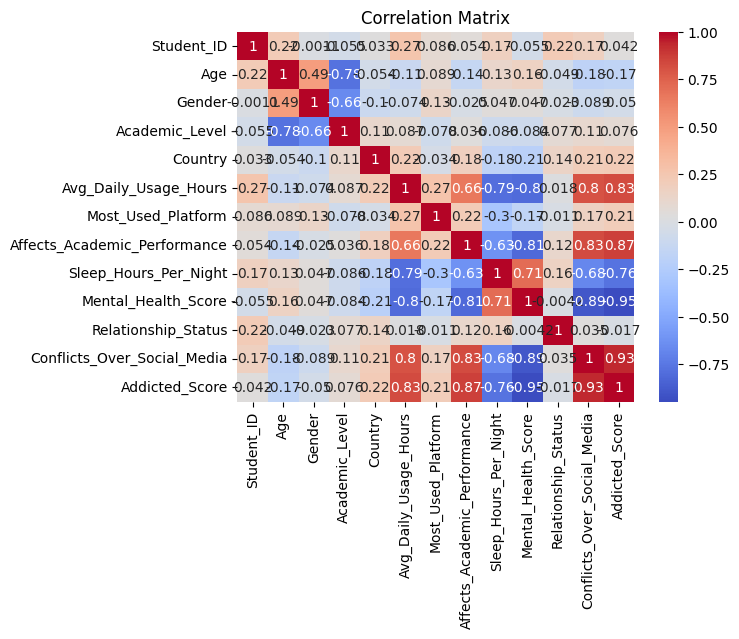

In [7]:
sns.heatmap(Add.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
X = Add.drop("Academic_Level", axis=1)  # replace with actual target column if different
y = Add["Academic_Level"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9716312056737588
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.89      0.89      0.89         9
           2       0.98      0.96      0.97        67

    accuracy                           0.97       141
   macro avg       0.95      0.95      0.95       141
weighted avg       0.97      0.97      0.97       141



In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      1.00      1.00         9
           2       1.00      0.99      0.99        67

    accuracy                           0.99       141
   macro avg       0.99      1.00      0.99       141
weighted avg       0.99      0.99      0.99       141



In [14]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9929078014184397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       0.90      1.00      0.95         9
           2       1.00      0.99      0.99        67

    accuracy                           0.99       141
   macro avg       0.97      1.00      0.98       141
weighted avg       0.99      0.99      0.99       141



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:22:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
# Identify Key Factors (Feature Importance)

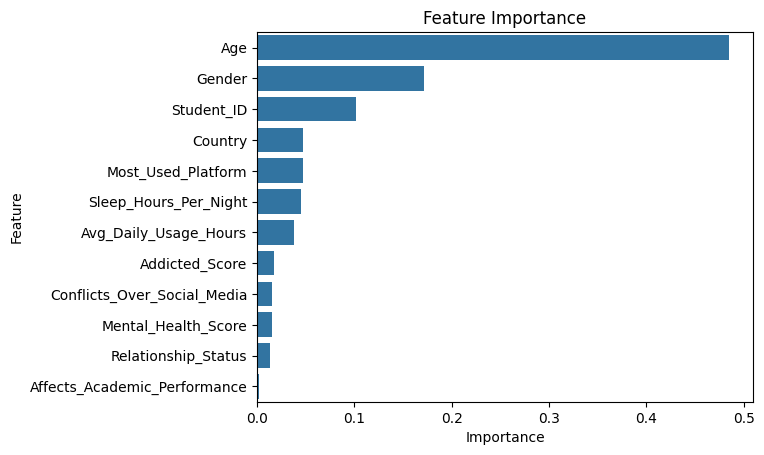

In [16]:
importances = rf.feature_importances_
features = X.columns
imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Feature Importance")
plt.show()

In [21]:
# Group Students (Clustering)

In [18]:
kmeans = KMeans(n_clusters=3)
Add['Cluster'] = kmeans.fit_predict(X)

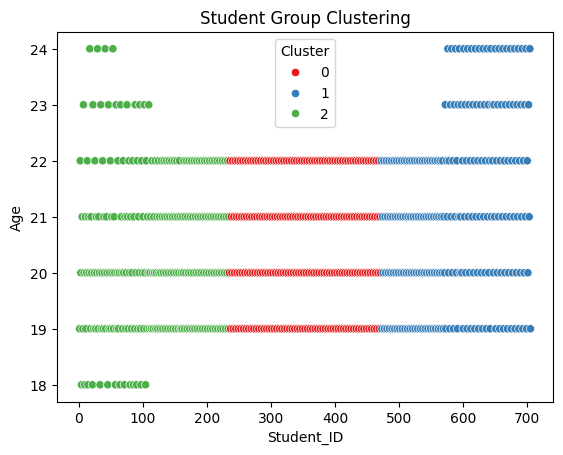

In [20]:
sns.scatterplot(data=Add, x=X.iloc[:, 0], y=X.iloc[:, 1], hue='Cluster', palette='Set1')
plt.title("Student Group Clustering")
plt.show()

In [24]:
Add.dropna(subset=['Country', 'Student_ID'], inplace=True)

In [26]:
# Group Students (Clustering)

# Convert the 'Country' column back to string type
Add['Country'] = Add['Country'].astype(str)

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(Add['Country'])
y = Add['Student_ID']  # target should be like Positive, Negative, Neutral

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          20 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [30]:
#Addiction Risk Level Predictor (ML Classification)

In [32]:
X = Add.drop(['Mental_Health_Score'], axis=1)
y = Add['Mental_Health_Score']

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9574468085106383
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.92      1.00      0.96        34
           2       1.00      0.95      0.97        38
           3       0.92      1.00      0.96        35
           4       1.00      0.93      0.97        30

    accuracy                           0.96       141
   macro avg       0.97      0.88      0.90       141
weighted avg       0.96      0.96      0.96       141



In [39]:
#Social Media Usage Pattern Clustering (Unsupervised ML)

In [42]:
X = Add.drop(columns=["Relationship_Status"])

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [45]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_scaled)

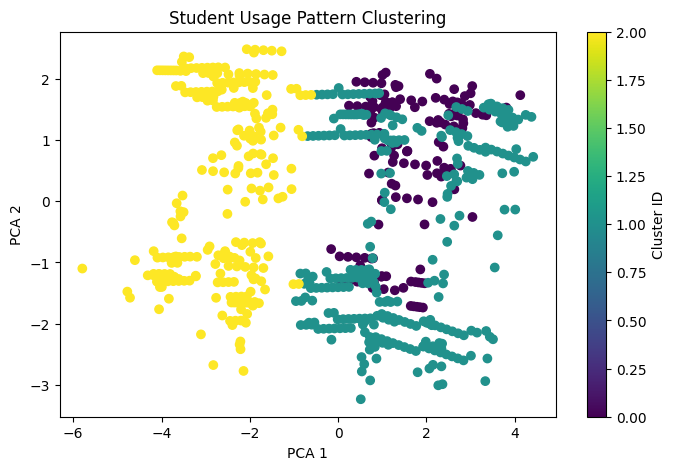

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.title("Student Usage Pattern Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster ID")
plt.show()

In [47]:
# Emotional Tone Detection from Social Media Comments (NLP + Sentiment Lexicon)

In [61]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [62]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [63]:
sid = SentimentIntensityAnalyzer()
Add['Sleep_Hours_Per_Night'] = Add['Addicted_Score'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

In [64]:
Add['Tone'] = Add['Sleep_Hours_Per_Night'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

In [67]:
print(Add[['Addicted_Score', 'Sleep_Hours_Per_Night', 'Tone']].head(10))

   Addicted_Score  Sleep_Hours_Per_Night     Tone
0               8                    0.0  Neutral
1               3                    0.0  Neutral
2               9                    0.0  Neutral
3               4                    0.0  Neutral
4               7                    0.0  Neutral
5               9                    0.0  Neutral
6               2                    0.0  Neutral
7               8                    0.0  Neutral
8               5                    0.0  Neutral
9               4                    0.0  Neutral


In [68]:
#  Detect Cyberbullying or Offensive Language in Student Comments (Toxicity Classification - NLP)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [71]:
Add = Add.dropna(subset=['Student_ID', 'Mental_Health_Score'])
X = Add['Student_ID']
y = Add['Mental_Health_Score']

In [73]:
#  Detect Cyberbullying or Offensive Language in Student Comments (Toxicity Classification - NLP)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

Add = Add.dropna(subset=['Student_ID', 'Mental_Health_Score'])
X = Add['Student_ID']
y = Add['Mental_Health_Score']

# Convert the 'Student_ID' column to string type
X = X.astype(str)

tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2)

In [75]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [76]:
print("'Mental_Health_Score Student_ID Detection Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

'Mental_Health_Score Student_ID Detection Accuracy: 0.36879432624113473
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        31
           6       0.37      1.00      0.54        52
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        21

    accuracy                           0.37       141
   macro avg       0.07      0.20      0.11       141
weighted avg       0.14      0.37      0.20       141



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
# Time-Based Social Media Activity Detection (Usage Forecasting using Regression)

In [86]:
X = Add[['Student_ID']]
y = Add['Mental_Health_Score']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

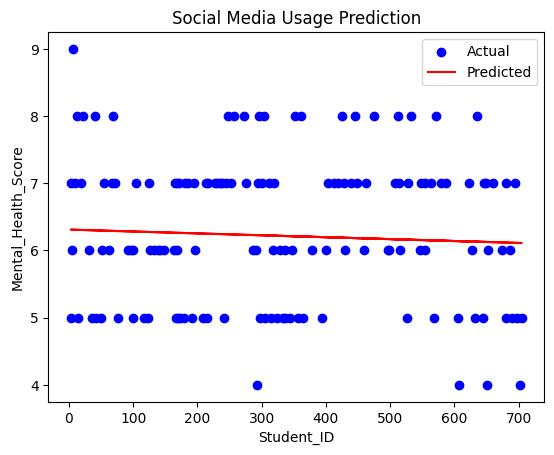

In [91]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Student_ID')
plt.ylabel('Mental_Health_Score')
plt.title('Social Media Usage Prediction')
plt.legend()
plt.show()